In [ ]:
# This work uses RNN called LSTM to predict the closing price of the companies. 

In [ ]:
#Install yfinance library
!pip install yfinance


In [ ]:
#Import needed libraries
import math 
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import time
import datetime
import yfinance as yf
import csv
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
#Get the stock datas
url = 'https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv'
df = pd.read_csv(url)

df = df.set_index(pd.DatetimeIndex(df['Date'].values))
#Show the data
df

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
2015-02-17,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
2015-02-18,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2015-02-19,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
2015-02-20,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
2015-02-23,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing
...,...,...,...,...,...,...,...,...,...,...,...
2017-02-10,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
2017-02-13,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
2017-02-14,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
2017-02-15,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing


In [ ]:
#Get the number of columns and rows in the dataset
df.shape

(506, 11)

In [ ]:
#Visualize the closing price history 
fig = go.Figure(
    data =
    [
     go.Candlestick(
         x=df.index,
         open=df['AAPL.Open'],
         high=df['AAPL.High'],
         low=df['AAPL.Low'],
         close=df['AAPL.Close']
         )])

fig.update_layout(xaxis_rangeslider_visible = False,
                  template = 'plotly_dark',
                  title = 'Apple Price',
                  yaxis_title = 'Apple Stock Price USD ($)',
                  xaxis_title = 'Date')
fig.update_yaxes(type='log')

fig.show()
#Visualize the closing price history with the candlestick patterns

In [ ]:
#Create a new dataframe with only the Closing Prices column
dt = df.filter(['AAPL.Close'])
#Convert the dataframe to numpy array
dataset = dt.values
#Get the number of rows to train the LSTM model on
training_data_length = math.ceil(len(dataset) * .8)

training_data_length

405

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


In [ ]:
#Create the training dataset and the scaled training dataset
train_data = scaled_data[0:training_data_length, : ]
#Split the data x_train and y_train datasets
x_train = []
y_train = []

for i in range(100, len(train_data)):
  x_train.append(train_data[i - 100:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 101:
    print(x_train)
    print(y_train)
    print()

[array([0.8299758 , 0.84967912, 0.84370161, 0.8669472 , 0.94443225,
       0.92605718, 0.85122864, 0.88731465, 0.84392322, 0.85787029,
       0.86384782, 0.845694  , 0.79853905, 0.80274525, 0.81470011,
       0.75647569, 0.706221  , 0.75514726, 0.73610805, 0.76621655,
       0.81248629, 0.84414447, 0.82267002, 0.78724832, 0.81624981,
       0.80473781, 0.73145897, 0.75049818, 0.72858102, 0.79765348,
       0.75470456, 0.75071961, 0.7744079 , 0.81934919, 0.78968357,
       0.78060666, 0.8018597 , 0.81381454, 0.80827989, 0.79610378,
       0.80673021, 0.79322565, 0.7617889 , 0.82488383, 0.80960834,
       0.84746513, 0.87071071, 0.88421527, 0.93668362, 0.89041406,
       0.84790799, 0.77064438, 0.85477091, 0.84923626, 0.78503449,
       0.76754498, 0.77307963, 0.82532672, 0.79654649, 0.78658419,
       0.78968357, 0.85477091, 0.85078612, 0.88222287, 0.87956635,
       0.87934476, 0.90878911, 0.93424835, 0.86960372, 0.92317906,
       0.91742316, 0.88421527, 0.88997117, 0.8771311 , 0.8806

In [ ]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data to 3 dimension for LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(305, 100, 1)

In [ ]:
#Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Compile the model with optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')


In [1]:
#Train the model
model.fit(x_train, y_train, batch_size=2, epochs=99)

NameError: ignored

In [ ]:
#Create the testing dataset and a new array containing scaled values
test_data = scaled_data[training_data_length - 100: , : ]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_length : , : ]
for i in range(100, len(test_data)):
  x_test.append(test_data[i - 100: i, 0])

len(test_data)

201

In [ ]:
#Convert the x_test to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test= np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Get the mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

1.8867136920443994

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



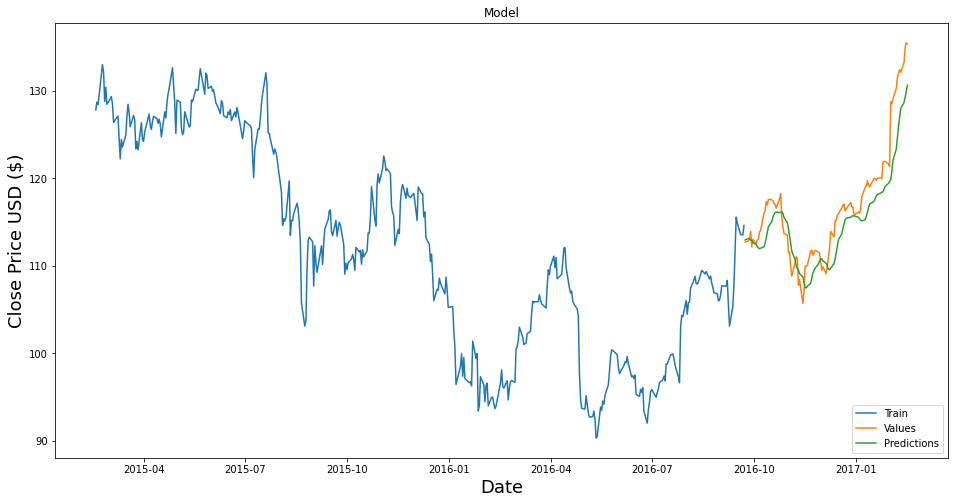

In [ ]:
#Plot the data
train = dt[:training_data_length]
valid = dt[training_data_length:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AAPL.Close'])
plt.plot(valid[['AAPL.Close', 'Predictions']])
plt.legend(['Train', 'Values', 'Predictions'], loc='lower right')
plt.show() 

In [ ]:
valid

,AAPL.Close,Predictions
2016-09-23,112.709999,112.967430
2016-09-26,112.879997,113.138672
2016-09-27,113.089996,113.104256
2016-09-28,113.949997,112.978371
2016-09-29,112.180000,112.917488
...,...,...
2017-02-10,132.119995,128.008835
2017-02-13,133.289993,128.694031
2017-02-14,135.020004,129.298264
2017-02-15,135.509995,129.983124


In [ ]:
 len(test_data)

201

In [ ]:
x_input = test_data[101:].reshape(1, -1)
x_input.shape

(1, 100)

In [ ]:
temp_input = list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.4990037967457117,
 0.503652878097252,
 0.5226920859573183,
 0.48350685152771433,
 0.5027674895454393,
 0.49103390504834854,
 0.5016604937272633,
 0.5027674895454393,
 0.5213638149516009,
 0.5251273527812117,
 0.5691832536901318,
 0.5747179007021894,
 0.5977418773022332,
 0.5897721405749863,
 0.6041620899748081,
 0.602391135762478,
 0.6006200044414434,
 0.5928715429017388,
 0.5915431169259047,
 0.5813593664237184,
 0.6046049724287132,
 0.6178880809804754,
 0.5589993482178293,
 0.534425670454409,
 0.5176002992605775,
 0.5136153534118963,
 0.46823118149725884,
 0.47044499602490575,
 0.4314812138915478,
 0.40956387889227086,
 0.44432163923669776,
 0.4587115886365192,
 0.45472662064924974,
 0.38631847213456894,
 0.40048714634684845,
 0.3402701647170723,
 0.37126423226177163,
 0.4350232994249126,
 0.43413773376439524,
 0.43657300058828863,
 0.47354455332177414,
 0.47509425448515064,
 0.46247525929765887,
 0.47487282432749245,
 0.4700023128182931,
 0.4675670459943997,
 0.446756728951887,
 

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.90426147]
101
1 day input [0.50365288 0.52269209 0.48350685 0.50276749 0.49103391 0.50166049
 0.50276749 0.52136381 0.52512735 0.56918325 0.5747179  0.59774188
 0.58977214 0.60416209 0.60239114 0.60062    0.59287154 0.59154312
 0.58135937 0.60460497 0.61788808 0.55899935 0.53442567 0.5176003
 0.51361535 0.46823118 0.470445   0.43148121 0.40956388 0.44432164
 0.45871159 0.45472662 0.38631847 0.40048715 0.34027016 0.37126423
 0.4350233  0.43413773 0.436573   0.47354455 0.47509425 0.46247526
 0.47487282 0.47000231 0.46756705 0.44675673 0.42395401 0.43303092
 0.41554141 0.43413773 0.45804745 0.4821786  0.52269209 0.50830214
 0.55014405 0.55014405 0.56409131 0.56741212 0.58224493 0.58910785
 0.59154312 0.57449647 0.57958826 0.59597092 0.58490163 0.58423749
 0.56409131 0.57139709 0.56851896 0.58158082 0.61036105 0.63427059
 0.63692729 0.65109596 0.64002667 0.63537759 0.65663061 0.65640918
 0.6517601  0.65663061 0.65840174 0.65596647 0.69825109 0.69957952
 0.69980079 0.69271644 0.68651766 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
df1 = df.reset_index()['AAPL.Close']

In [ ]:
len(df1)

506

In [ ]:
#Reshape data for 2D array instead 1D array
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

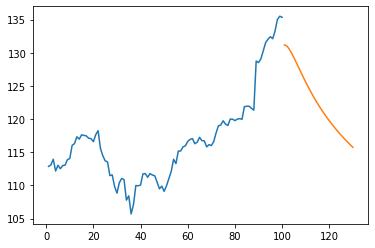

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df1[406:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

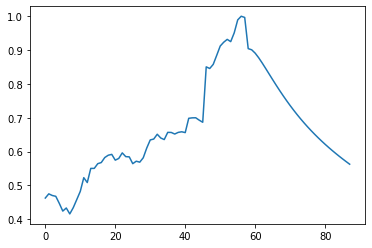

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[448:])

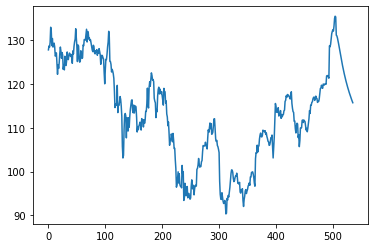

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)